<a href="https://colab.research.google.com/github/Amit-exe/Skin_care/blob/master/Skin_lesion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from PIL import Image as pil_image
import tensorflow as tf
from glob import glob
import seaborn as sns
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('HAM10000_metadata.csv')

In [ ]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


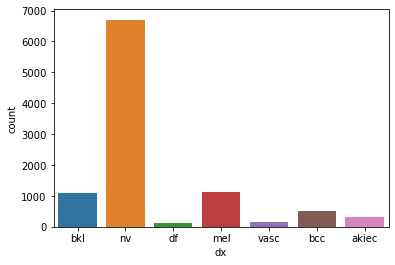

In [ ]:
sns.countplot(data['dx'])

In [ ]:
data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

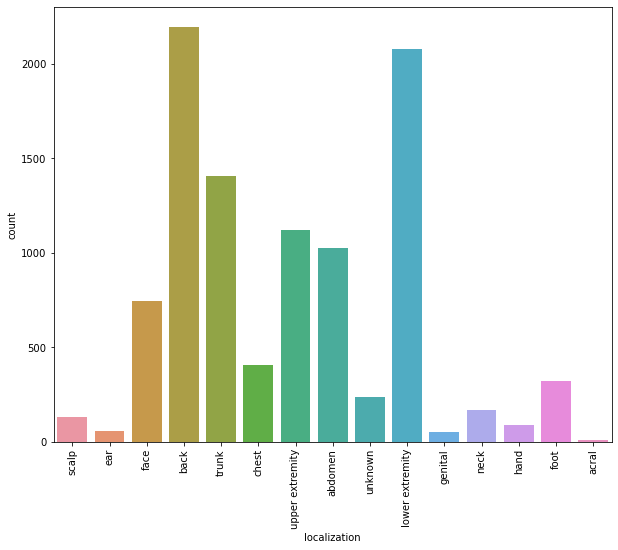

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data['localization'])
plt.xticks(rotation=90)

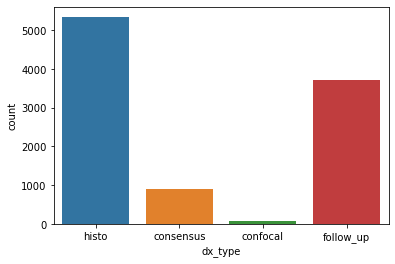

In [ ]:
sns.countplot(data['dx_type'])

In [ ]:
data['dx_type'].value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

In [ ]:
data.isna().sum().sort_values(ascending=False)

age             57
localization     0
sex              0
dx_type          0
dx               0
image_id         0
lesion_id        0
dtype: int64

In [ ]:
print(data['age'].mean())
print(data['age'].median())
data['age'].fillna(data['age'].mean(),inplace=True)

51.863828077927295
50.0


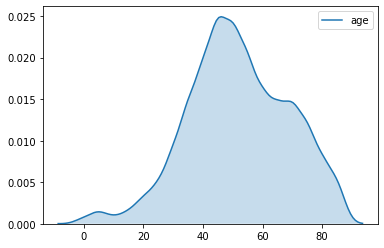

In [ ]:
sns.kdeplot(data['age'], shade =True)

In [ ]:
data['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_classes_dict = {
    0:'nv',
    1:'mel',
    2:'bkl',
    3:'bcc',
    4:'akiec',
    5:'vasc',
    6:'df'
}

data['cell_type'] = data['dx'].map(lesion_type_dict)

data['cell_type_idx'] = pd.Categorical(data['cell_type']).codes

In [ ]:
#pil_image = os.path.join('images')
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join('', '*', '*.jpg'))}

In [ ]:
data['path'] = data['image_id'].map(image_path.get)
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,HAM10000_images_part_2\ISIC_0031633.jpg


In [ ]:
image_example = np.asarray(pil_image.open(data['path'][0]))

In [ ]:
image_example.shape

(450, 600, 3)

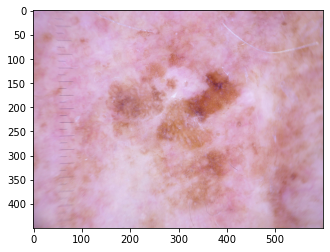

In [ ]:
plt.imshow(image_example)

In [ ]:
data['image'] = data['path'].map(lambda x: np.asarray(pil_image.open(x).resize((120,90))))

In [ ]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0027419.jpg,"[[[190, 152, 194], [192, 155, 197], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0025030.jpg,"[[[24, 13, 22], [24, 14, 23], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0026769.jpg,"[[[185, 126, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,HAM10000_images_part_1\ISIC_0025661.jpg,"[[[24, 11, 17], [25, 11, 20], [31, 16, 27], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,HAM10000_images_part_2\ISIC_0031633.jpg,"[[[131, 89, 111], [143, 98, 121], [153, 108, 1..."


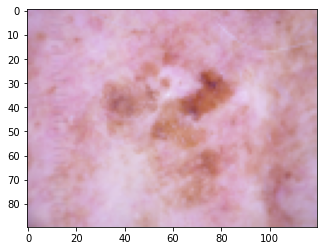

In [ ]:
plt.imshow(data['image'][0])

In [ ]:
data['image'][0].shape

(90, 120, 3)

In [ ]:
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
data.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [ ]:
features = data.drop(['cell_type_idx'],axis=1)

target = data['cell_type_idx']

In [ ]:
print(type(features), type(target))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
data['cell_type_idx'].value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: cell_type_idx, dtype: int64

In [ ]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(features,target,test_size=0.25)

In [ ]:
x_train = np.asarray(X_TRAIN['image'].tolist())
x_test = np.asarray(X_TEST['image'].tolist())

In [ ]:
print(x_train.shape)
print(x_test.shape)

(7511, 90, 120, 3)
(2504, 90, 120, 3)


In [ ]:
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train-x_train_mean) / x_train_std
x_test = (x_test-x_test_mean) / x_test_std

In [ ]:
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(7511,)
(2504,)


In [ ]:
y_train = to_categorical(Y_TRAIN,num_classes=7)
y_test = to_categorical(Y_TEST,num_classes=7)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(7511, 7)
(2504, 7)


In [ ]:
pickle_out = open("x_train.data","wb")
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out = open("x_test.data","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.data","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out = open("y_test.data","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [ ]:
#Classifier

In [ ]:
x_train = pickle.load(open("x_train.data","rb"))
y_train = pickle.load(open("y_train.data","rb"))

In [ ]:
print(x_train.shape, y_train.shape)

(7511, 90, 120, 3) (7511, 7)


In [ ]:
import time
from tensorflow.keras.callbacks import TensorBoard
NAME = "Skin_Cancer_mar_28{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

In [ ]:
x_train.shape

(7511, 90, 120, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size =(3,3),activation = 'relu', padding= 'same', input_shape = x_train.shape[1:]))
model.add(Conv2D(32,kernel_size =(3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(32,kernel_size =(3,3),activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(64, (3,3),activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(128, (3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(128, (3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(128, (3,3),activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(256, (3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(256, (3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(256, (3,3),activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(32, (3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(32, (3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(32, (3,3),activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(7,activation ='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 90, 120, 32)       896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 120, 32)       9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 120, 32)       9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 45, 60, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 60, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 30, 64)        0

In [ ]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from keras import callbacks 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True)

In [ ]:
model.fit(x_train,y_train, batch_size=64,
                              epochs = 100,
          validation_split=0.1
                              , callbacks=[tensorboard,earlystopping])

Epoch 1/100
106/106 [==============================] - 75s 581ms/step - loss: 1.3192 - accuracy: 0.6304 - val_loss: 1.0060 - val_accuracy: 0.6742
Epoch 2/100
106/106 [==============================] - 89s 847ms/step - loss: 1.0217 - accuracy: 0.6659 - val_loss: 0.9364 - val_accuracy: 0.6742
Epoch 3/100
106/106 [==============================] - 135s 1s/step - loss: 0.9655 - accuracy: 0.6716 - val_loss: 0.9259 - val_accuracy: 0.6755
Epoch 4/100
106/106 [==============================] - 190s 2s/step - loss: 0.9176 - accuracy: 0.6756 - val_loss: 0.9059 - val_accuracy: 0.6822
Epoch 5/100
106/106 [==============================] - 197s 2s/step - loss: 0.9029 - accuracy: 0.6817 - val_loss: 0.9133 - val_accuracy: 0.6835
Epoch 6/100
106/106 [==============================] - 236s 2s/step - loss: 0.9318 - accuracy: 0.6709 - val_loss: 0.9654 - val_accuracy: 0.6955
Epoch 7/100
106/106 [==============================] - 254s 2s/step - loss: 0.8861 - accuracy: 0.6844 - val_loss: 0.8624 - val_accur

In [ ]:
from keras.models import load_model
model_saved_tf = "Skin_cancer_model"
model = load_model(model_saved_tf)

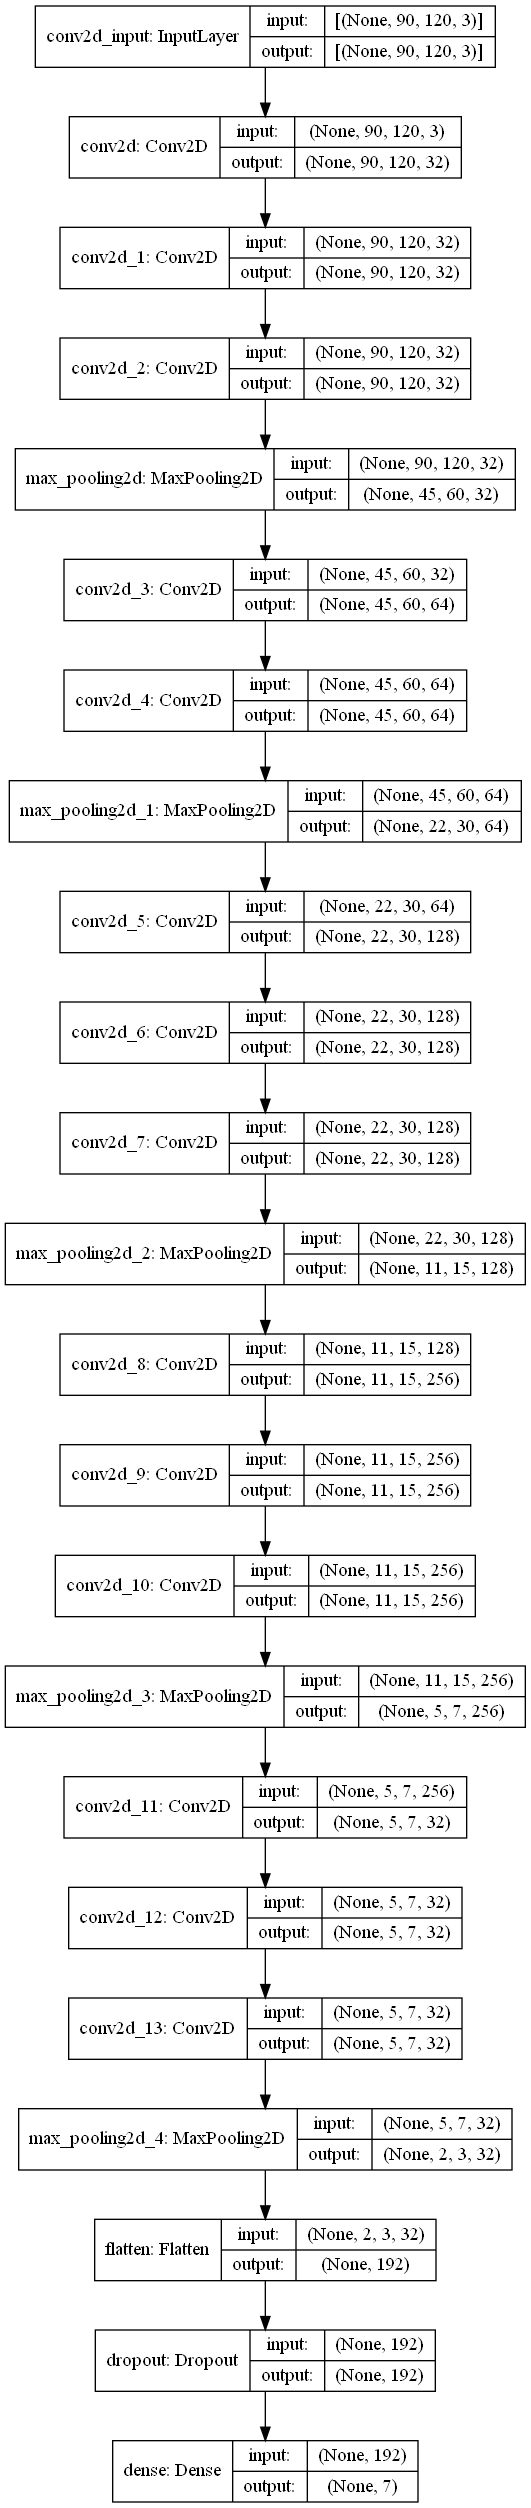

In [ ]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
x_test = pickle.load(open("x_test.data","rb"))
y_test = pickle.load(open("y_test.data","rb"))

In [ ]:
label = [
            "Actinic keratoses",
            "Basal cell carcinoma",
            "Benign keratosis-like lesions",
            "Dermatofibroma",
            "Melanocytic nevi",
            "Melanoma",
            "Vascular lesions"]

In [ ]:
predictions = model.predict(x_test)

In [ ]:
correct=0
incorrect=0

for i,j in zip(predictions, y_test):
    pred,actual = np.argmax(i),np.argmax(j)
    print("predicted class" ,pred ,"actual class", actual)
    if np.argmax(i)==np.argmax(j):
        correct+=1
    else:
        incorrect+=1
total = correct+incorrect
Acc_percentage = (correct/total)*100
print("\n\n===================Accuracy metrices on testing data=================")
print("\n\nTotal Test samples:\t",total)
print("Correct prediction:\t",correct)
print("Incorrect prediction:\t",incorrect)
print("Accuracy Percentage:\t", Acc_percentage,"%")
print("\n\n=====================================================================")

predicted class 4 actual class 2
predicted class 2 actual class 5
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 0
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 0 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 5
predicted class 4 actual class 4
predicted class 5 actual class 5
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 3
predicted class 4 actual class 4
predicted class 4 actual class 5
predicted class 4 actual class 4
predicted class 5 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 5 actual class 4
predicted class 4 actual class 4
predicted 

predicted class 2 actual class 5
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 5
predicted class 2 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 2
predicted class 4 actual class 3
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 5 actual class 5
predicted class 4 actual class 5
predicted class 0 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 3
predicted class 4 actual class 4
predicted class 0 actual class 0
predicted class 2 actual class 5
predicted 

predicted class 4 actual class 4
predicted class 4 actual class 2
predicted class 4 actual class 2
predicted class 4 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 1 actual class 2
predicted class 2 actual class 0
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 5
predicted class 4 actual class 4
predicted class 2 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 0
predicted class 4 actual class 1
predicted class 4 actual class 4
predicted class 4 actual class 5
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 4
predicted class 4 actual class 4
predicted 

predicted class 4 actual class 5
predicted class 5 actual class 2
predicted class 2 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 2
predicted class 0 actual class 1
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 5 actual class 5
predicted class 2 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 5 actual class 2
predicted class 4 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 1 actual class 1
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 4 actual class 4
predicted class 2 actual class 4
predicted class 4 actual class 4
predicted class 6 actual class 3
predicted class 4 actual class 2
predicted class 4 actual class 4
predicted class 4 actual class 2
predicted 

In [ ]:
model_saved_tf = "Skin_cancer_model"

In [ ]:
tf.saved_model.save(model, model_saved_tf)

INFO:tensorflow:Assets written to: Skin_cancer_model\assets


In [ ]:
loaded = tf.saved_model.load(model_saved_tf)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_input': TensorSpec(shape=(None, 90, 120, 3), dtype=tf.float32, name='conv2d_input')})
{'dense': TensorSpec(shape=(None, 7), dtype=tf.float32, name='dense')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_saved_tf)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
tflite_model = converter.convert()
tflite_model_file = 'march_28_skin_opti.tflite'

with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

In [ ]:
# Loading model
  
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]



interpreter = tf.lite.Interpreter(model_path="march_28_skin_opti.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
x1 = x_test[:50]
y1 = y_test[:50]

In [ ]:
correct1=0
incorrect1=0
for i , j in zip(x1,y1):
    x = i.reshape(-1,90,120,3)
    input_shape = input_details[0]['shape']
    input_data = np.array(x, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    a1,b1 = np.argmax(output_data), np.argmax(j)
    print("prediction", a1, "actual", b1)
    if a1==b1:
        correct1+=1
    else:
        incorrect1+=1
    
total1 = correct1+incorrect1
Acc_percentage1 = (correct1/total1)*100    
    
print("\n\n==Accuracy metrices on 50 testing data after converting model in Tflite format==")
print("\n\nTotal Test samples:\t",total1)
print("Correct prediction:\t",correct1)
print("Incorrect prediction:\t",incorrect1)
print("Accuracy Percentage:\t", Acc_percentage1,"%")
print("\n\n======================================================================================")

prediction 4 actual 2
prediction 2 actual 5
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 2 actual 0
prediction 4 actual 4
prediction 4 actual 4
prediction 0 actual 2
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 5
prediction 4 actual 4
prediction 5 actual 5
prediction 4 actual 4
prediction 4 actual 4
prediction 2 actual 3
prediction 4 actual 4
prediction 4 actual 5
prediction 4 actual 4
prediction 5 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 5 actual 4
prediction 4 actual 4
prediction 4 actual 2
prediction 1 actual 1
prediction 2 actual 0
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 1 actual 1
prediction 4 actual 4
prediction 4 actual 4
prediction 5 actual 5
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 4
prediction 4 actual 1
prediction